# Figure 1: Denmark Strait freshwater transports

This notebook will reproduce Figure 1 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [80]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [81]:
fd_trans=xr.open_dataset('../data_out/Denmark_Strait_full_depth_transports.nc')

In [76]:
img = np.asarray(Image.open('../other_data/jgrc24213-fig-0001-m.jpg'))
img.shape

(2200, 2128, 3)

In [43]:
fd_mean=fd_trans.mean(dim='time')
fd_sd=fd_trans.std(dim='time')

/tmp/ipykernel_43707/3409176240.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipykernel_43707/3409176240.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


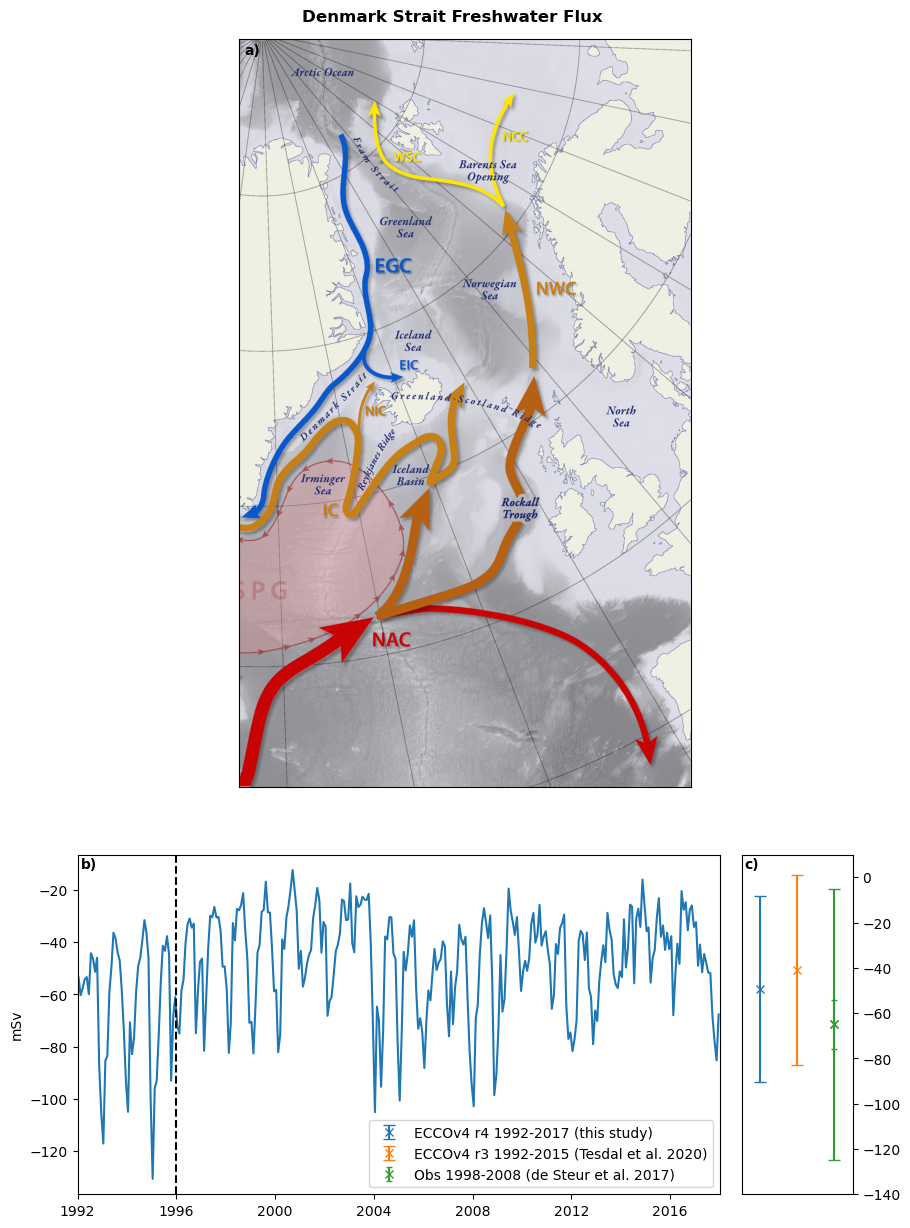

In [88]:
obs=[-65,11,60] # de Steur 2017
ecco_r3=[-41,42] # Tesdel et al. 2020
var='fw_trsp_adv'

fig, axs = plt.subplot_mosaic('''
                              CCCCCC
                              CCCCCC
                              AAAAAB
                              ''',
                              layout='constrained',sharey=False,figsize=[10,15])

ax=axs['C']
imgplot = ax.imshow(img[:,800:,:],)
ax.set_xticks([])
ax.set_yticks([])
plt.text(0.01,0.98,'a)',fontsize=10,fontweight='bold',transform=ax.transAxes)

ax=axs['A']
(1e3*fd_trans['fw_trsp_adv']).sel(Sref=34.8).plot(x='time',ax=ax)
ax.axvline(np.datetime64('1996-01-01'),color='k',ls='--')
ax.set_xlim([np.datetime64('1992-01-01'),np.datetime64('2018-01-01')])
ax.set_ylabel('mSv')
ax.set_xlabel('')
ax.set_title('')
plt.text(0.005,0.96,'b)',fontsize=10,fontweight='bold',transform=ax.transAxes)
plt.ylim([-140,10])

ax=axs['B']
p1a=ax.errorbar(-0.2,(fd_mean[var].sel(Sref=34.8)*1e3),yerr=2e3*fd_sd[var].sel(Sref=34.8),marker='x',ls='',capsize=4)
p2=ax.errorbar(0,ecco_r3[0],yerr=ecco_r3[1],marker='x',ls='',capsize=4)
p3=ax.errorbar(0.2,obs[0],yerr=obs[1],marker='x',ls='',capsize=2)
p4=ax.errorbar(0.2,obs[0],yerr=obs[2],marker='x',ls='',capsize=4,color=p3.lines[0].get_color())
ax.set_xlim([-0.3,0.3])
plt.xticks(None)
plt.xticks([], [])
ax.yaxis.tick_right()
ax.yaxis.set_tick_params(labelright=True)
plt.text(0.02,0.96,'c)',fontsize=10,fontweight='bold',transform=ax.transAxes)
plt.ylim([-140,10])

plt.suptitle('Denmark Strait Freshwater Flux',fontweight='bold',fontsize=12,y=0.9)
axs['A'].legend([p1a,p2,p3],['ECCOv4 r4 1992-2017 (this study)','ECCOv4 r3 1992-2015 (Tesdal et al. 2020)','Obs 1998-2008 (de Steur et al. 2017)'],loc='lower right')
plt.tight_layout()
plt.savefig('../plots/fig1_DS_fwtransports.pdf')